In [169]:
import pandas as pd
from sklearn import metrics
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

In [170]:
db = pd.read_excel(r"C:/Users/Adithya Ramesh/Desktop/SD03Q03/fruits.xlsx")
db.head()
X = db[features]
y = db.iloc[:,0]
#print(x)
#print(y)
v1=x
v2=y

In [171]:
db.columns

Index(['fruit_label', 'fruit_name', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [172]:
db.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


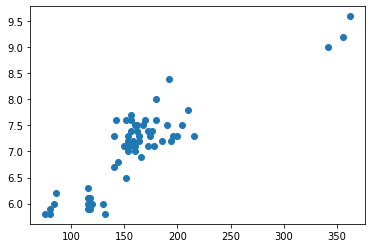

In [173]:
%matplotlib inline

plt.scatter(db['mass'],db['width'])

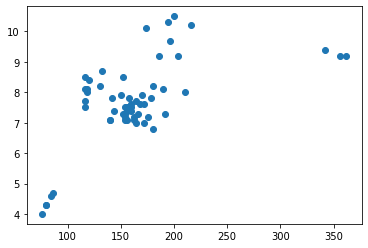

In [174]:
plt.scatter(db['mass'],db['height'])

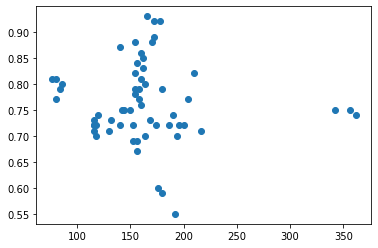

In [175]:
plt.scatter(db['mass'],db['color_score'])

In [176]:
db.iloc[:,1:].corr()

,mass,width,height,color_score
mass,1.000000,0.877687,0.609571,-0.079794
width,0.877687,1.000000,0.396848,-0.076576
height,0.609571,0.396848,1.000000,-0.247047
color_score,-0.079794,-0.076576,-0.247047,1.000000


In [177]:
features = ['mass','height']
X = db[features]
y = db.iloc[:,0]

In [180]:
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] = mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
def main() : 
      
    # Importing dataset 
      
     
  
    X = db.iloc[:,:-1].values 
  
    Y = db.iloc[:,-1:].values 
      
    # Splitting dataset into train and test set 
  
    from sklearn.model_selection import train_test_split
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=12, stratify=y)

      
    # Model training 
      
    model = K_Nearest_Neighbors_Classifier( K = 3 ) 
      
    model.fit( X_train, Y_train ) 
      
    model1 = KNeighborsClassifier( n_neighbors = 3 ) 
      
    model1.fit( X_train, Y_train ) 
      
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
    Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
      
    correctly_classified = 0
      
    correctly_classified1 = 0
      
    # counter 
      
    count = 0
      
    for count in range( np.size( Y_pred ) ) : 
          
        if Y_test[count] == Y_pred[count] : 
              
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] : 
              
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
   
    print( "Accuracy on test set by sklearn model   :  ", (  
      correctly_classified1 / count ) * 100 ) 

In [181]:
if __name__ == "__main__" :  
      
    main()

NameError: name 'KNeighborsClassifier' is not defined